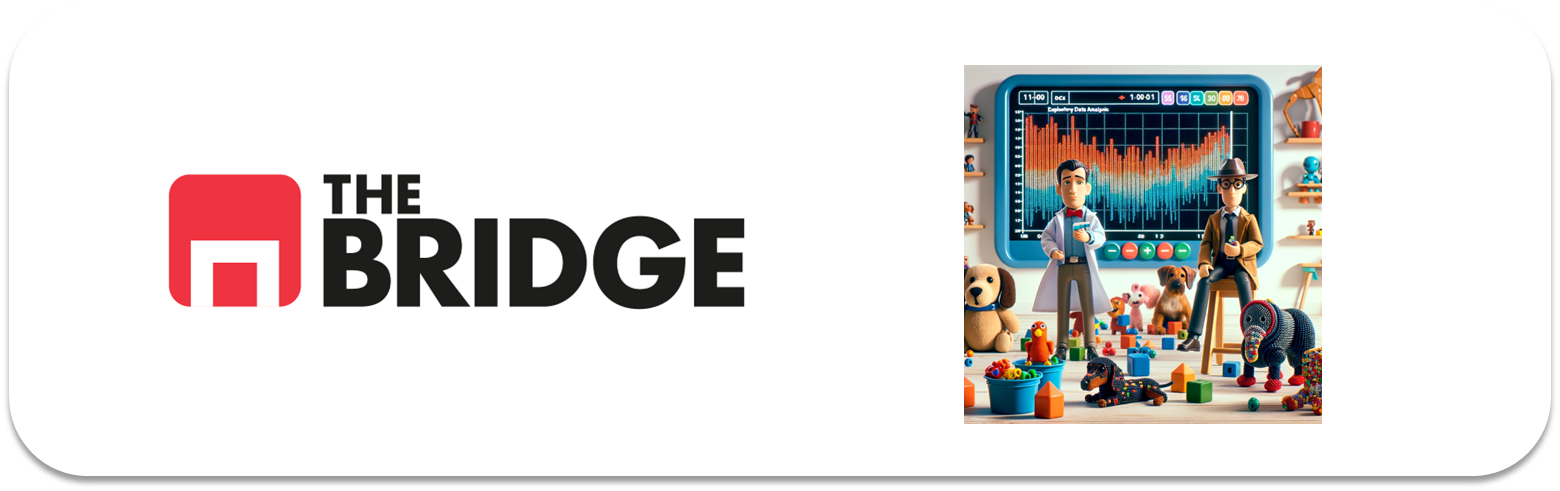

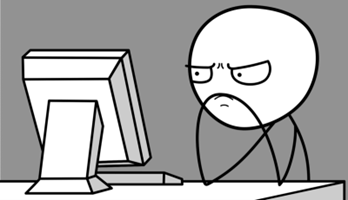

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bootcampviztools import *

from scipy.stats import chi2_contingency

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [3]:
df_admisiones = pd.read_csv('./data/admission_data.csv', index_col=0)

### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

In [5]:
df_admisiones.head()

,Year,Major,Gender,Admission
0,1973,School of Medicine,F,Rejected
1,1973,Department of Economics,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected


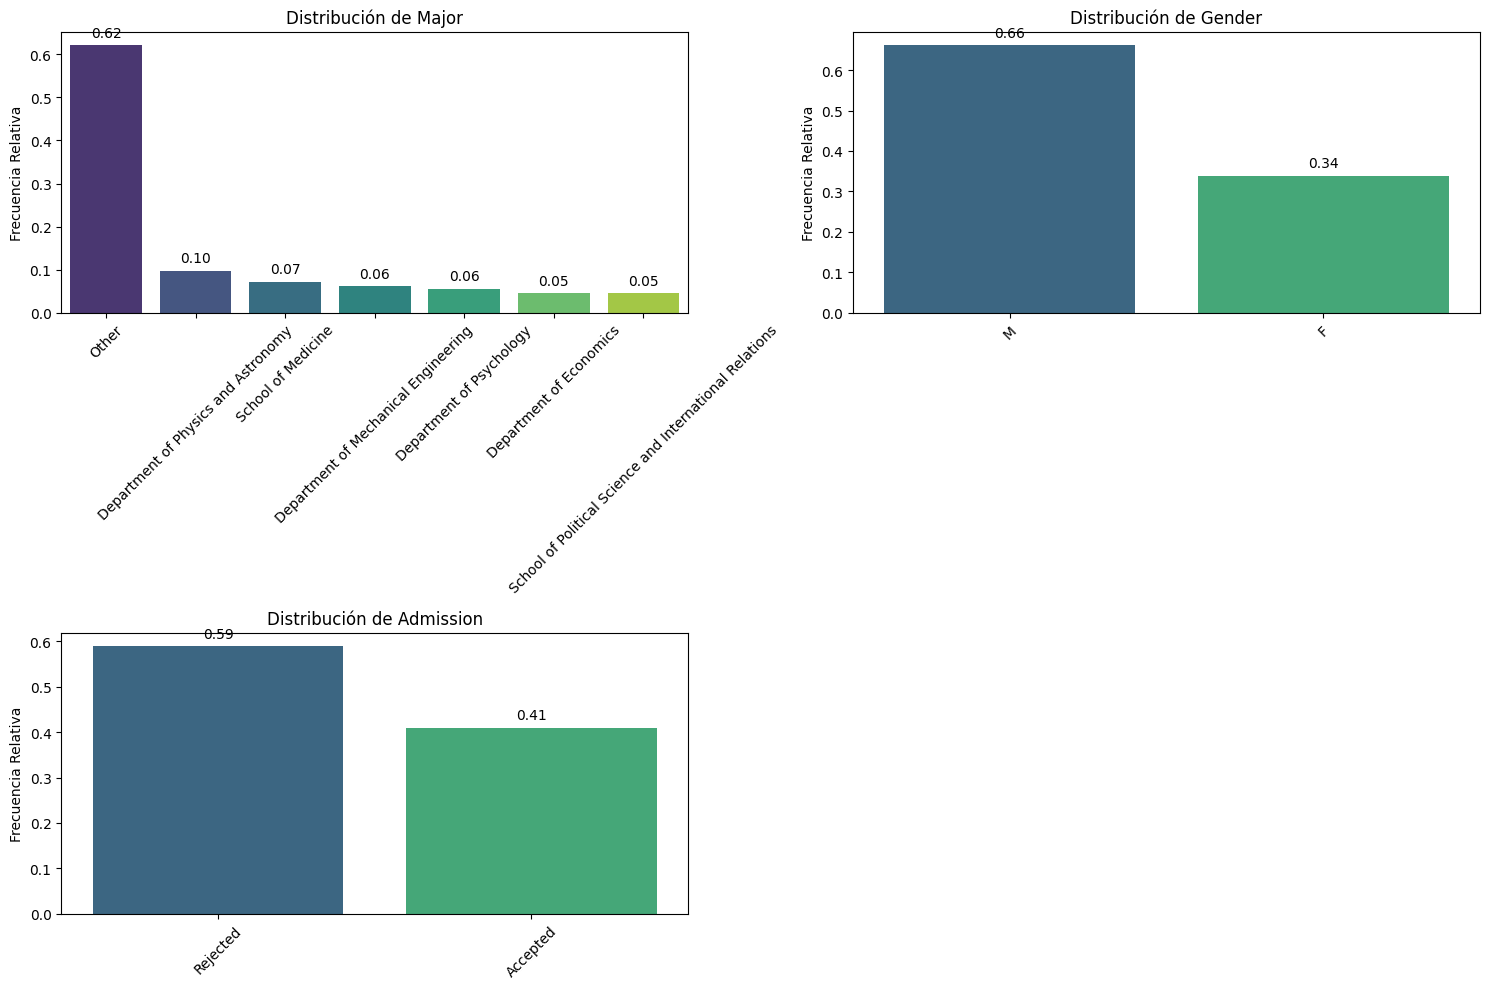

In [6]:
pinta_distribucion_categoricas(df_admisiones, ['Major','Gender','Admission'], relativa=True, mostrar_valores=True)

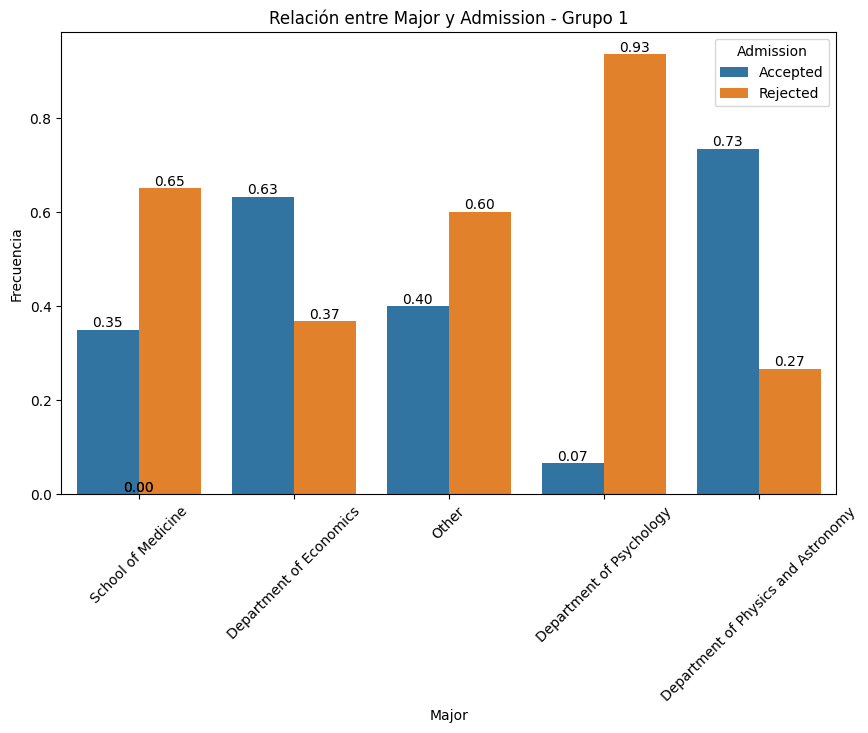

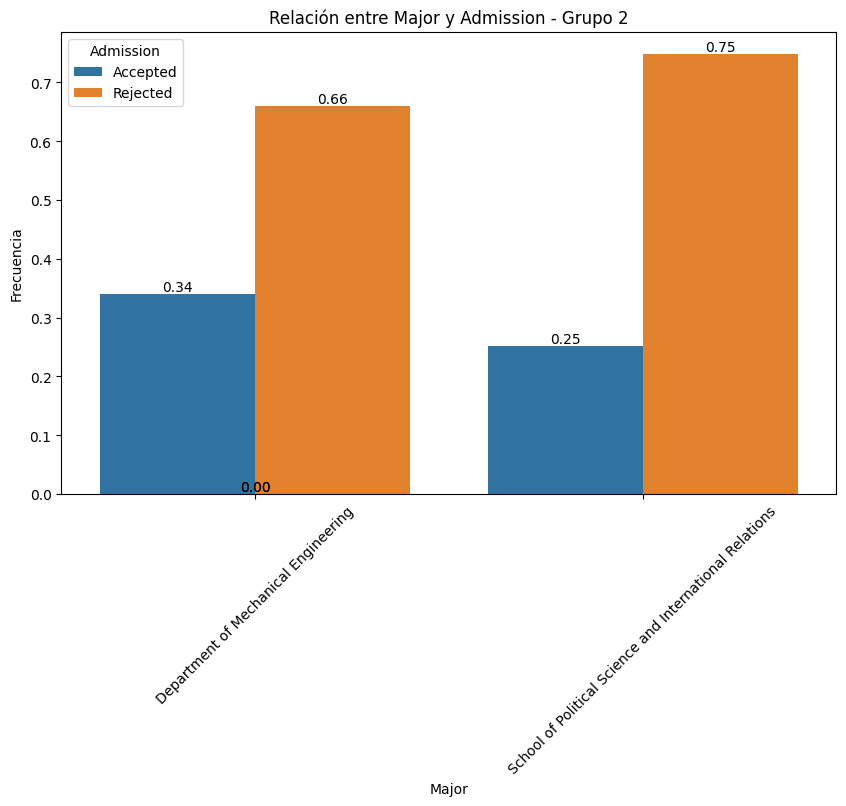

In [11]:
plot_categorical_relationship_fin(df_admisiones, 'Major', 'Admission', relative_freq=True, show_values=True)

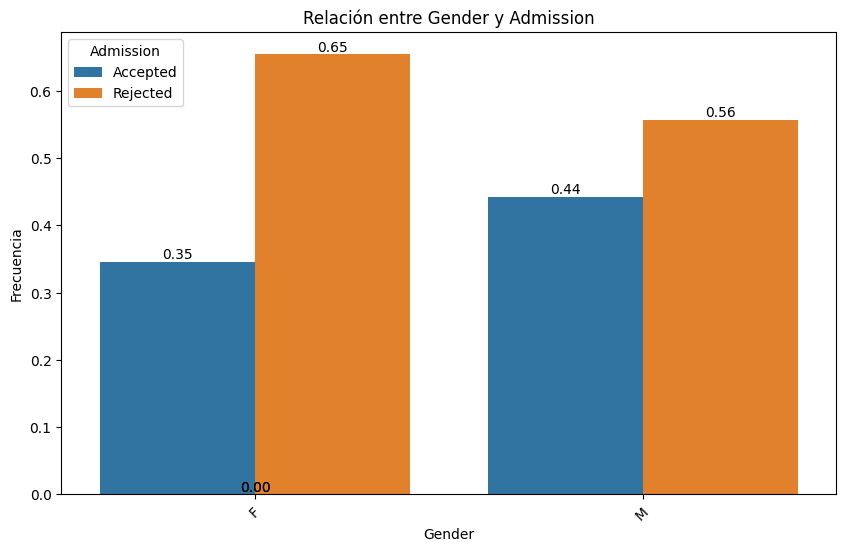

In [13]:
plot_categorical_relationship_fin(df_admisiones, 'Gender', 'Admission', relative_freq= True, show_values= True)

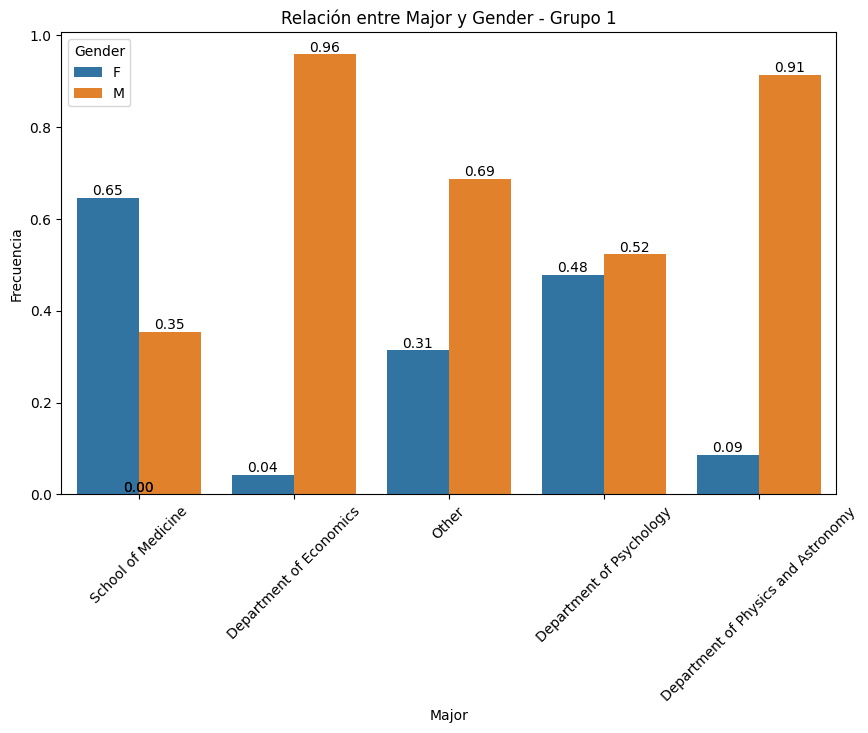

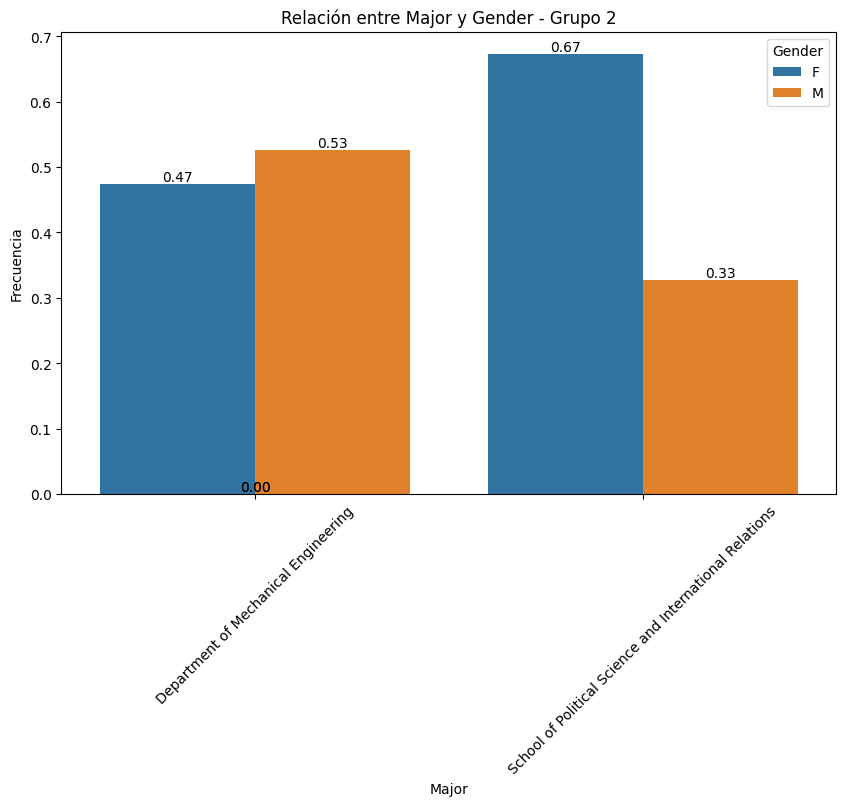

In [12]:
plot_categorical_relationship_fin(df_admisiones, 'Major', 'Gender', relative_freq= True, show_values= True)

In [15]:
columns = ['Admission', 'Major', 'Gender']
col_directora = 'Admission'
col_1 = [col for col in columns if col != col_directora][0]
col_2 = [col for col in columns if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_admisiones[col_directora].unique():
    diccionario_multivariante[valor] = df_admisiones.loc[df_admisiones[col_directora] == valor,[col_2, col_1]]

Rejected


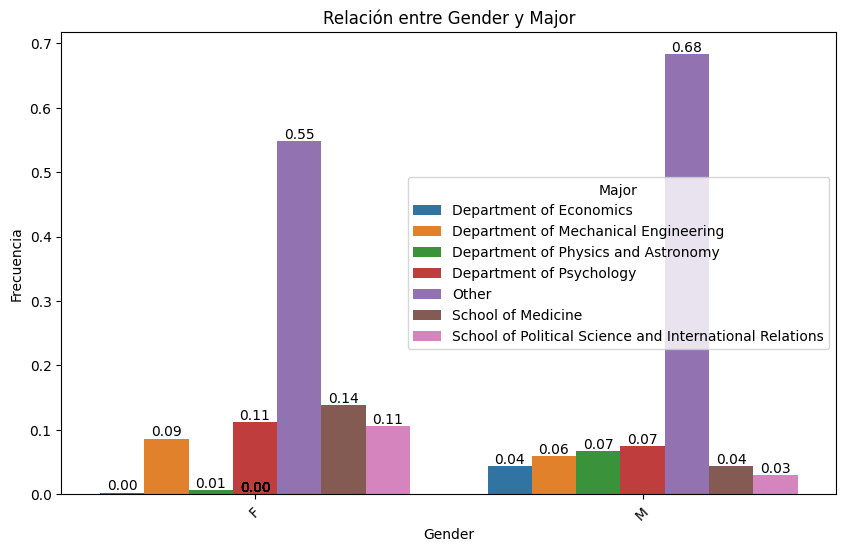

Accepted


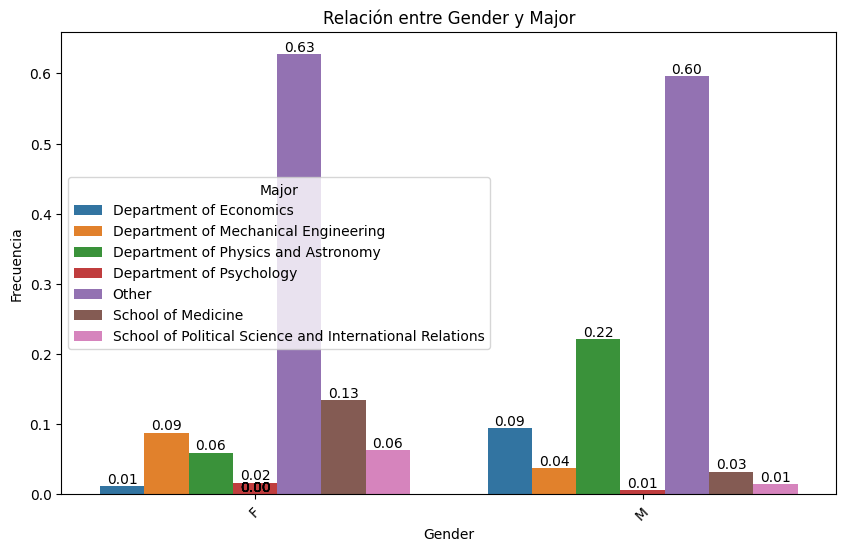

In [17]:
for valor, datos in diccionario_multivariante.items():
    print(valor)
    plot_categorical_relationship_fin(datos, col_2, col_1, relative_freq= True, show_values= True)

In [21]:
# Se puede ver una diferencia en el departamento de economia donde hay mas hombres que mujers
# Donde mas diferencia hay es en el departamento de fisica y astronomia donde hay un 16% mas de hombres que mujeres aceptadas

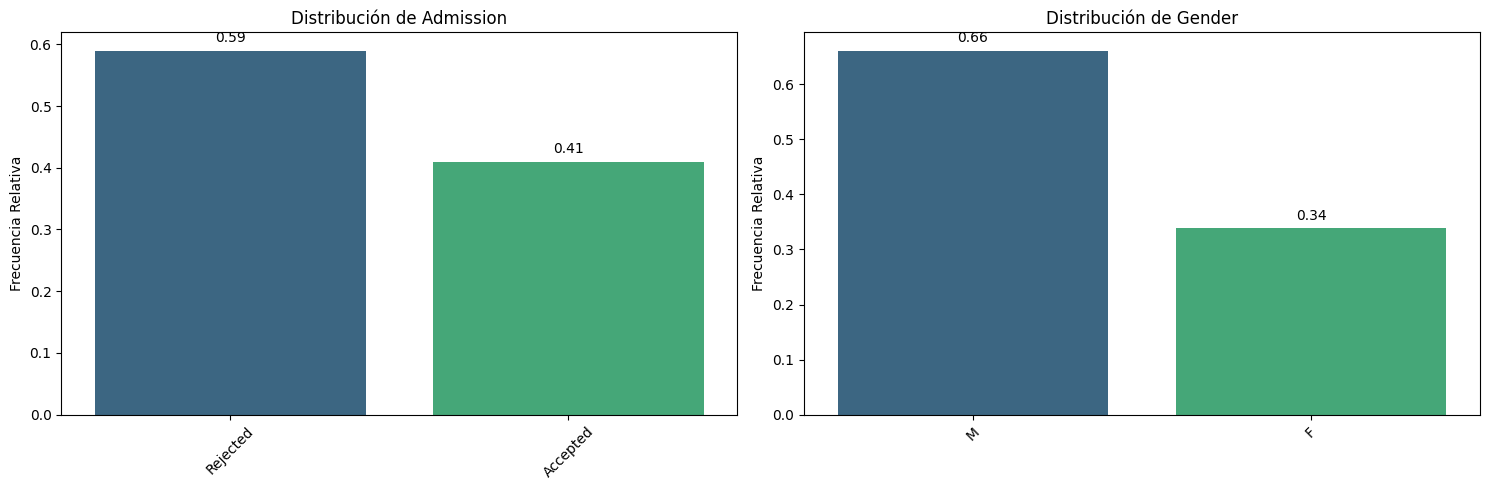

In [20]:
pinta_distribucion_categoricas(df_admisiones,["Admission","Gender"], relativa= True, mostrar_valores= True)

In [22]:
# Test de Chi-Cuadrado

tabla_contingencia = pd.crosstab(df_admisiones['Admission'], df_admisiones['Gender'])

tabla_contingencia

Gender,F,M
Admission,,
Accepted,1494,3738
Rejected,2827,4704


In [24]:

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 110.84892145390278
P-Value: 6.385628329926473e-26
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[1771.32899788 3460.67100212]
 [2549.67100212 4981.32899788]]


In [25]:
#Como vemos aquí con este test, salimos de dudas, las mujeres fueron mas veces rechazadas que los hombres
# Al tener un p-value muy pequeño, nos indica que esto no ha sido como la loteria

### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [28]:
df_tips = pd.read_csv('./data/tips.csv', index_col=0)

### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

In [31]:
df_coche = pd.read_csv('./data/car_crashes.csv', index_col=0, sep = '|')
df_coche.rename(columns = {'abbrev':'state'}, inplace = True)

### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

(5, 2)


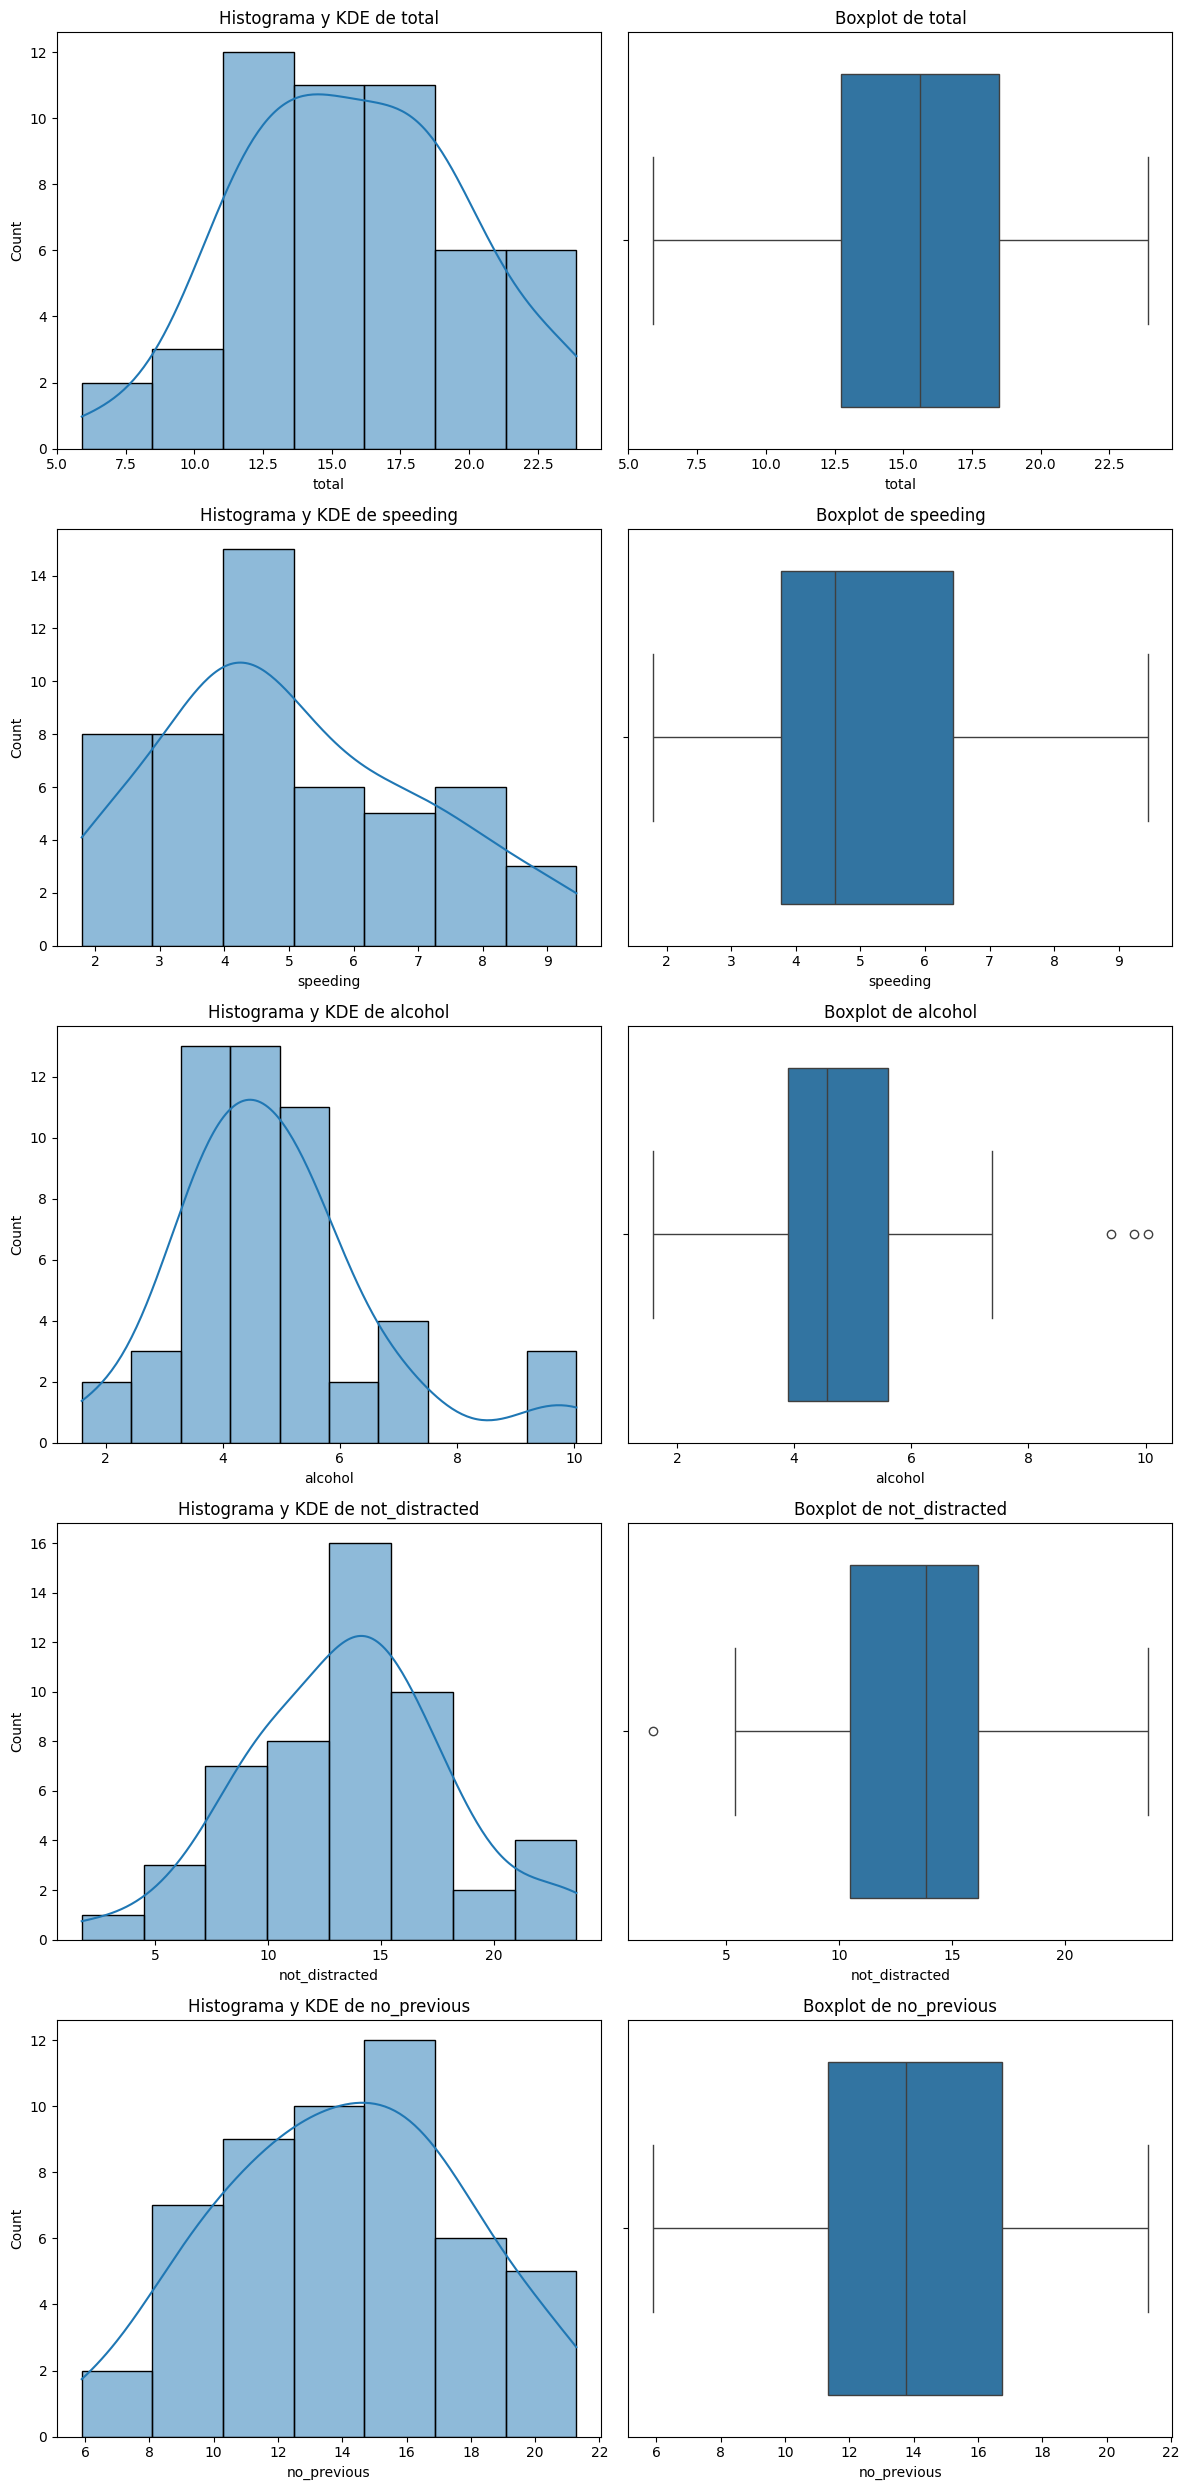

In [53]:
plot_combined_graphs(df_coche,["total","speeding", 'alcohol', 'not_distracted', 'no_previous'])

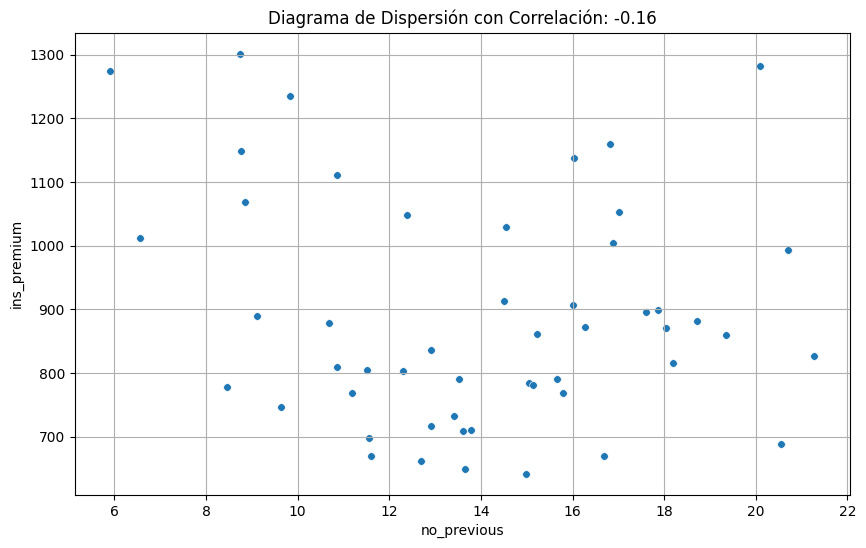

In [45]:
grafico_dispersion_con_correlacion(df_coche,"no_previous", "ins_premium", mostrar_correlacion= True, tamano_puntos= 30)

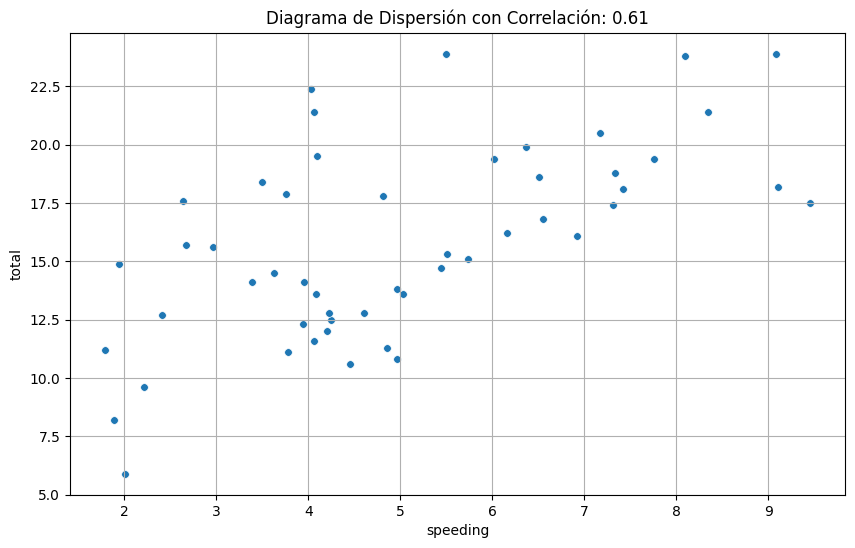

In [33]:
grafico_dispersion_con_correlacion(df_coche,"speeding", "total", mostrar_correlacion= True, tamano_puntos= 30)

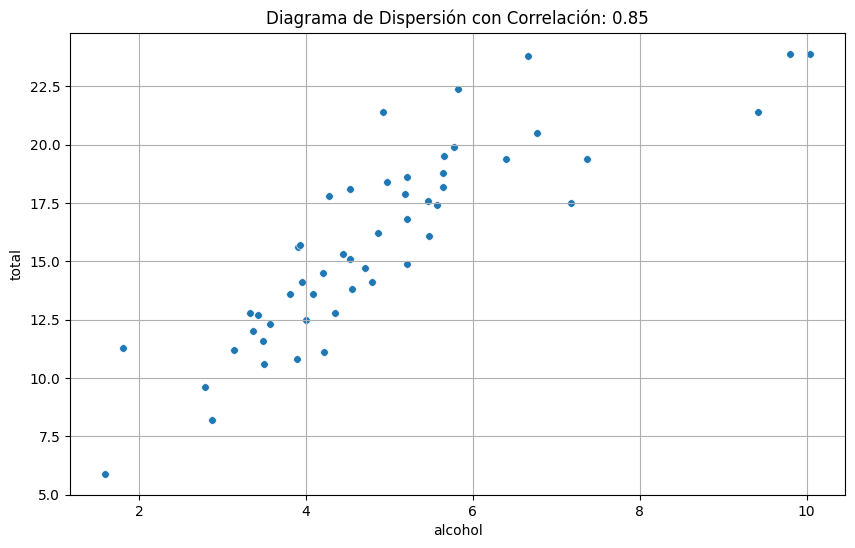

In [34]:
grafico_dispersion_con_correlacion(df_coche,"alcohol", "total", mostrar_correlacion= True, tamano_puntos= 30)

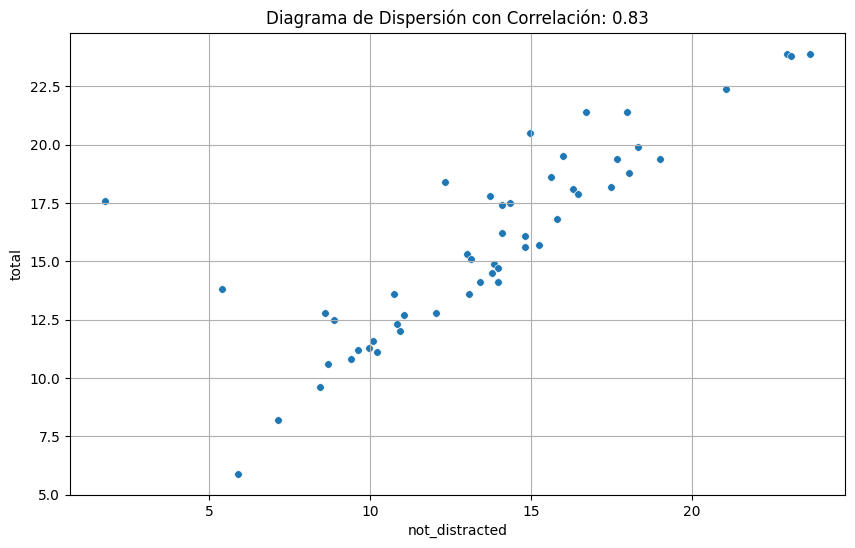

In [36]:
grafico_dispersion_con_correlacion(df_coche,"not_distracted", "total", mostrar_correlacion= True, tamano_puntos= 30)

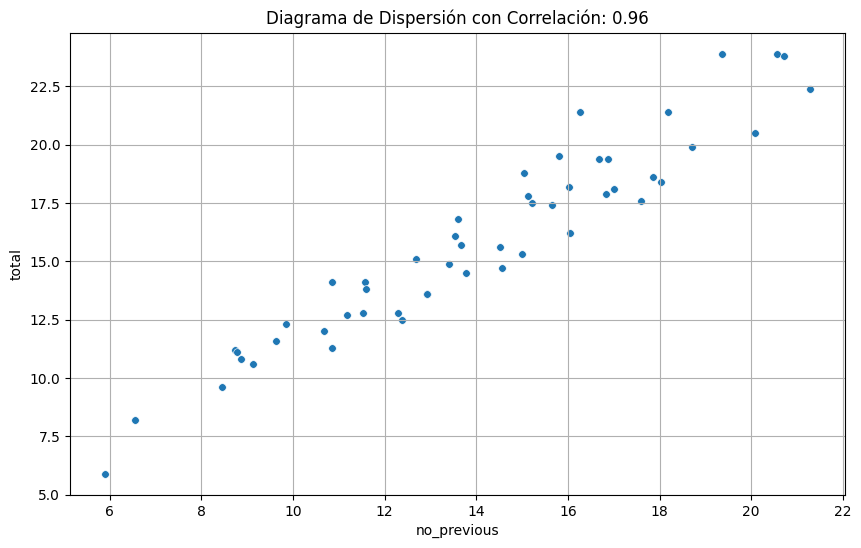

In [37]:
grafico_dispersion_con_correlacion(df_coche,"no_previous", "total", mostrar_correlacion= True, tamano_puntos= 30)

In [48]:
corr_matrix = df_coche.corr(numeric_only= True)
corr_matrix

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


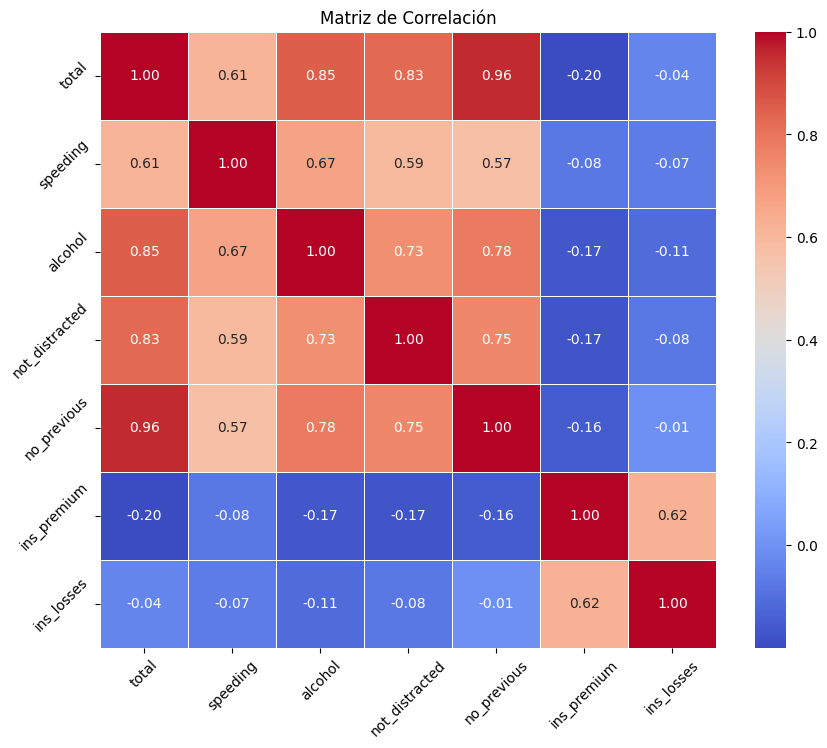

In [49]:
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

In [50]:
df_solo_numeros = df_coche.select_dtypes(include = ["float","int"])
df_solo_numeros.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses'],
      dtype='object')

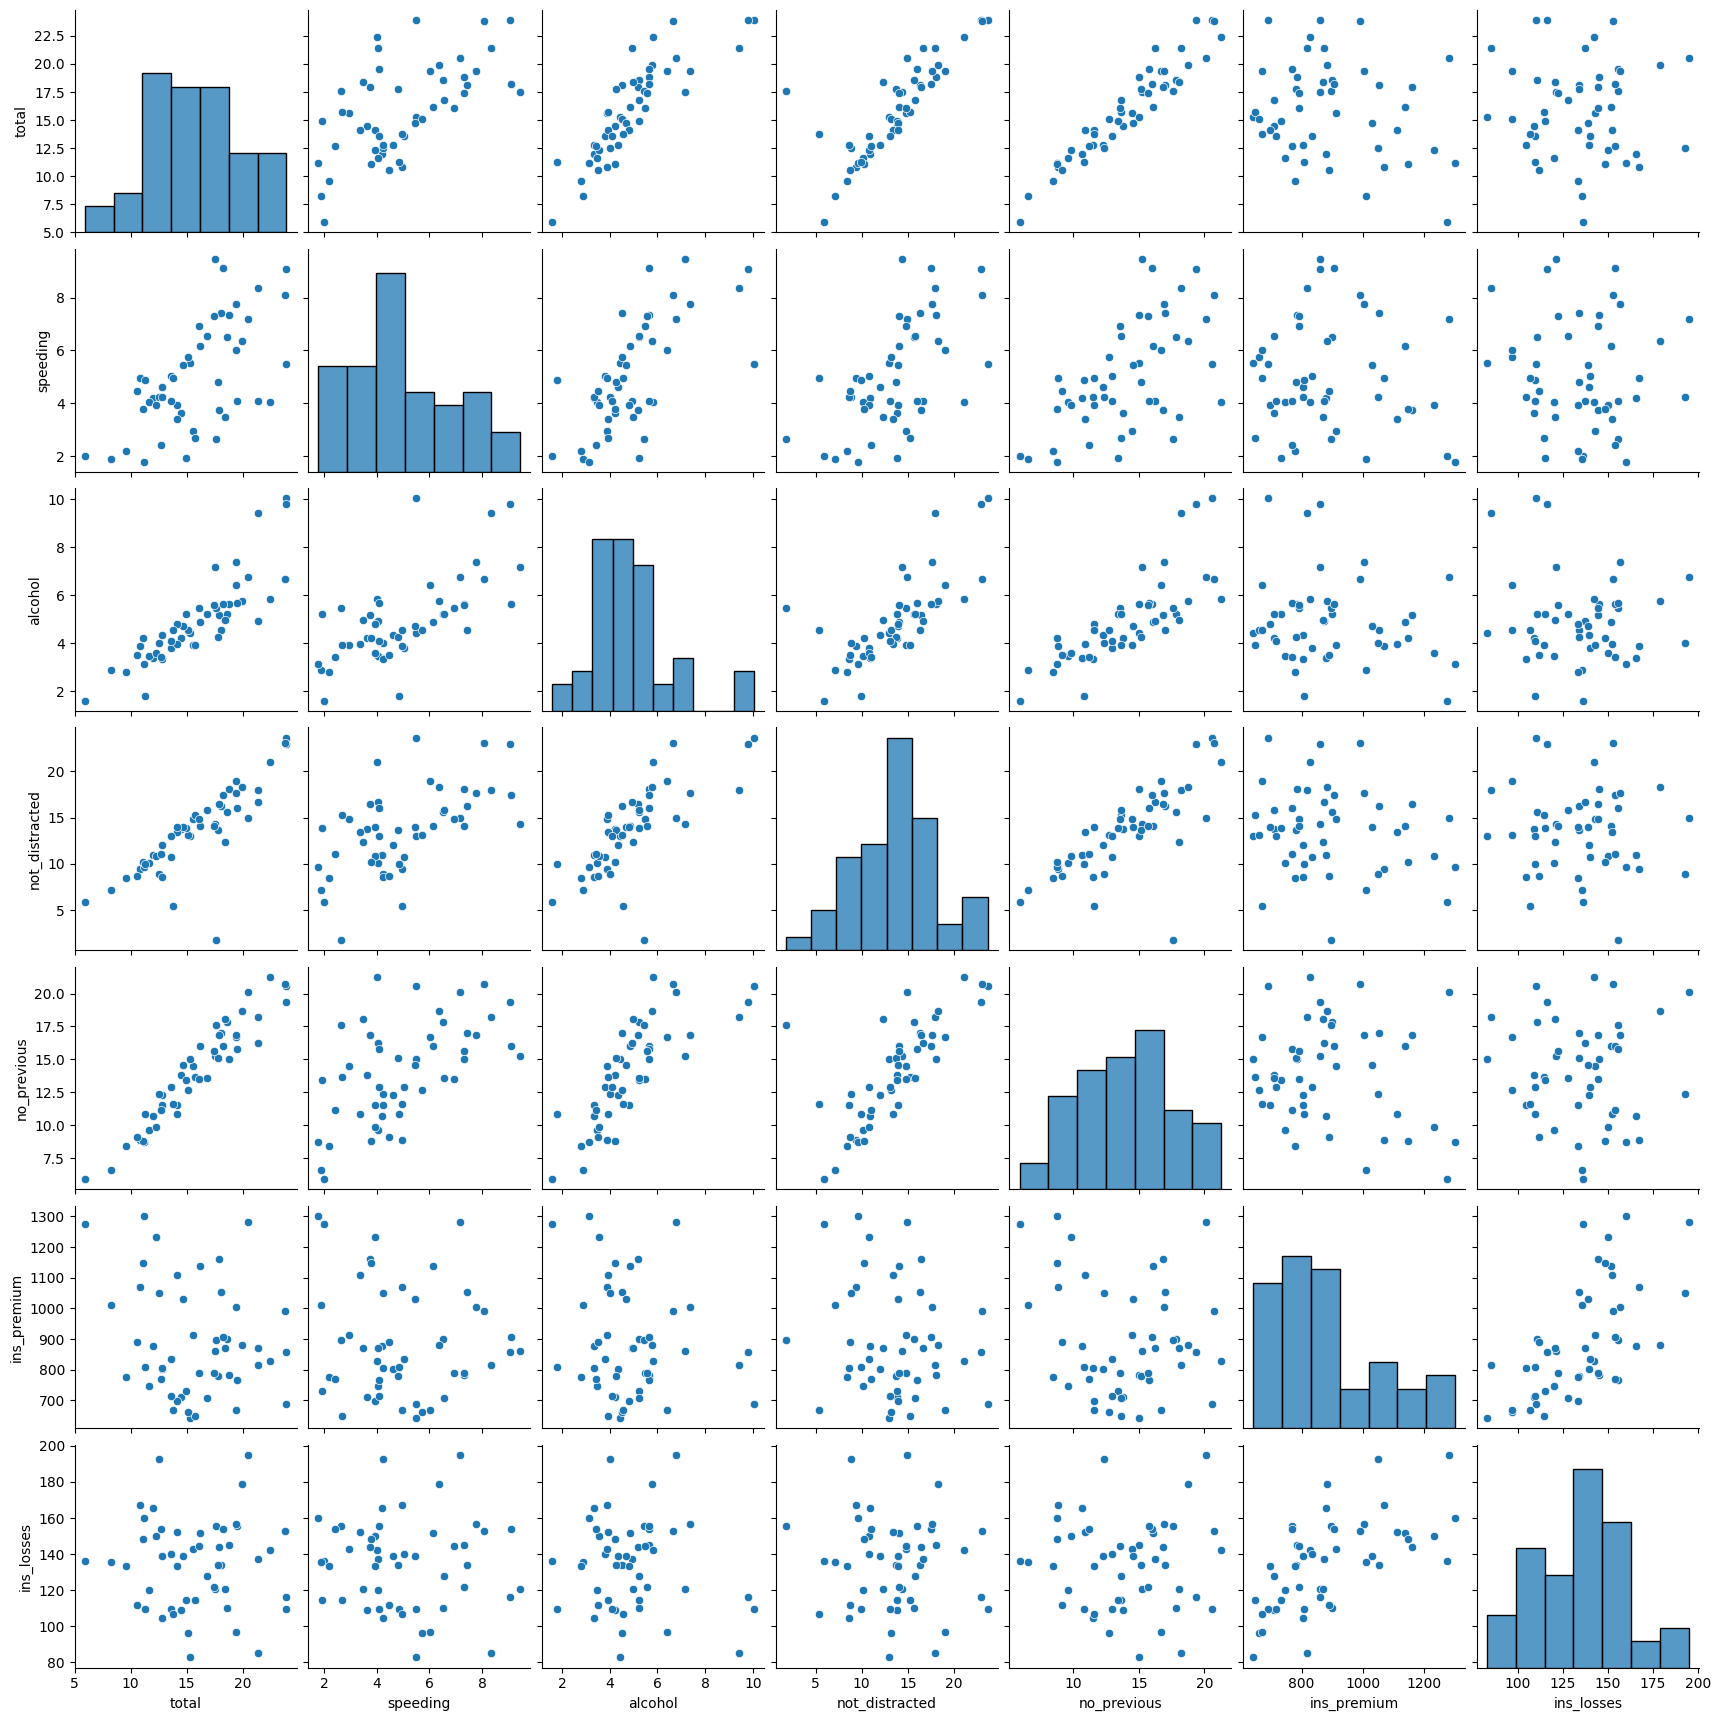

In [51]:
sns.pairplot(df_solo_numeros)
plt.show()

In [54]:
#Podemos observar que los que no han tenido accidente antes es la que mas correlacion tiene (no_previous) esto significa 
#que cada vez hay mas conductores, entonces a mayor numero de conductores mas accidentes

#Tambien vemos que las personas que tenias mas accidentes es por causas de alcohol

### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?

(3, 2)


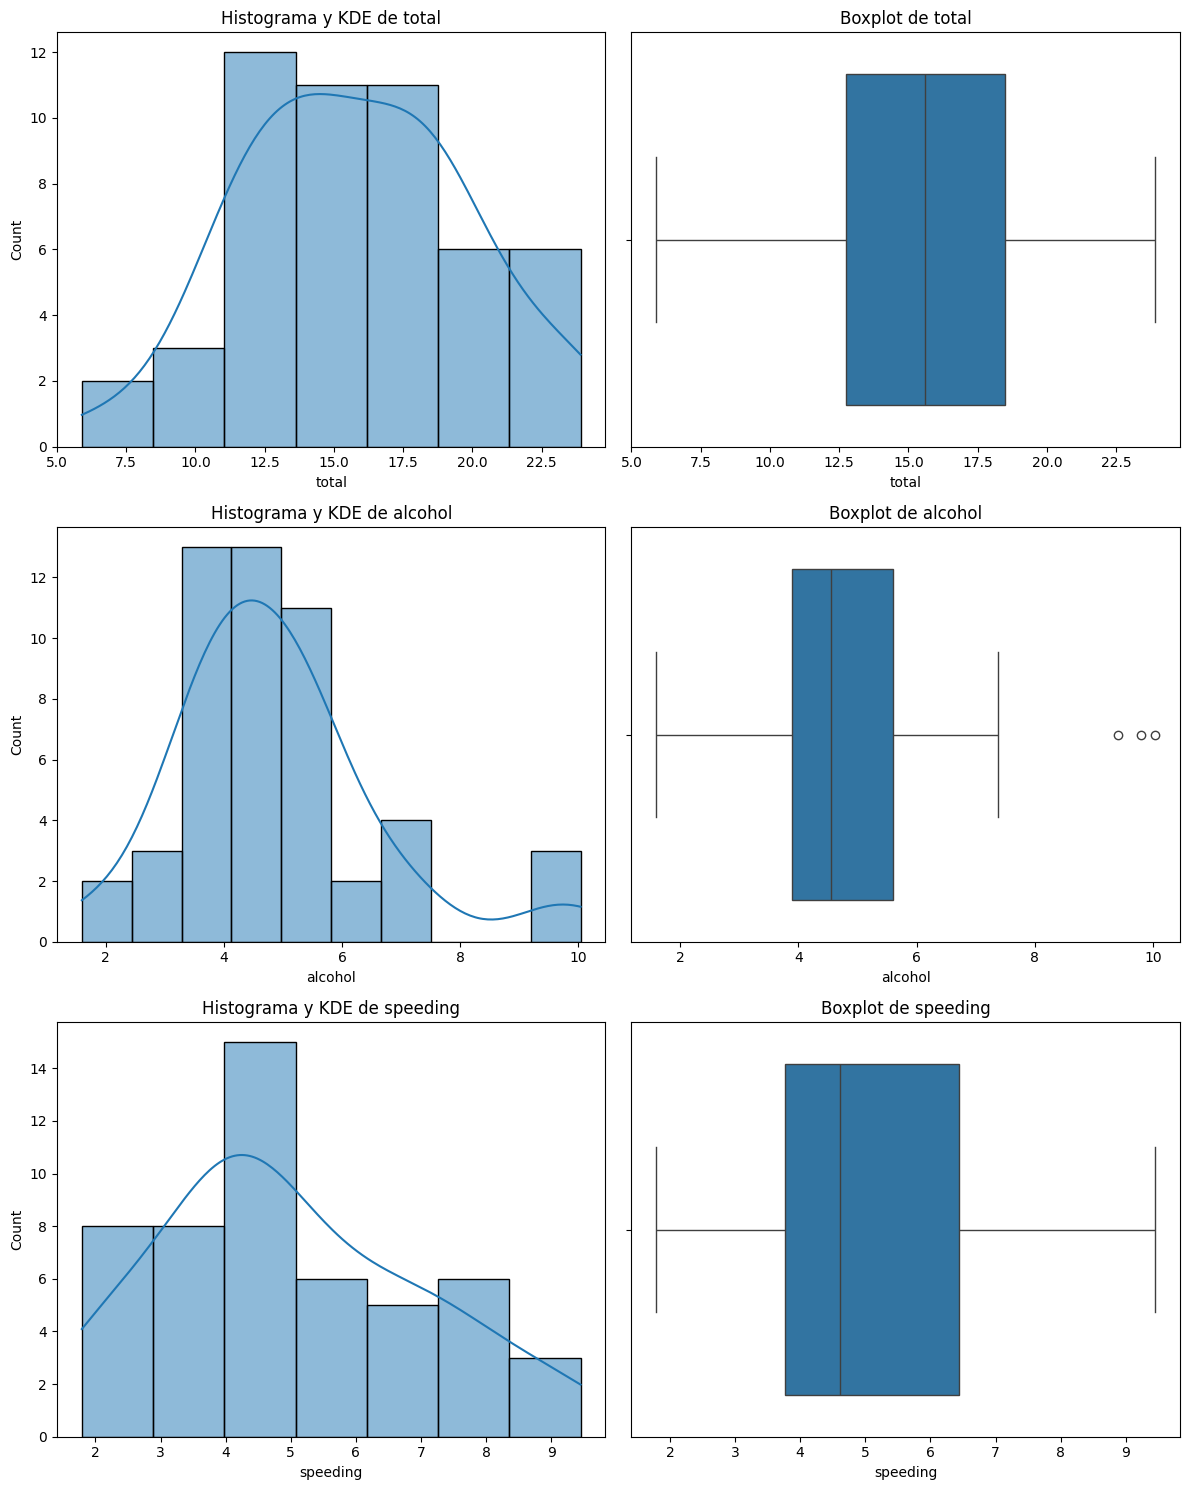

In [56]:
plot_combined_graphs(df_coche,["total","alcohol","speeding"])

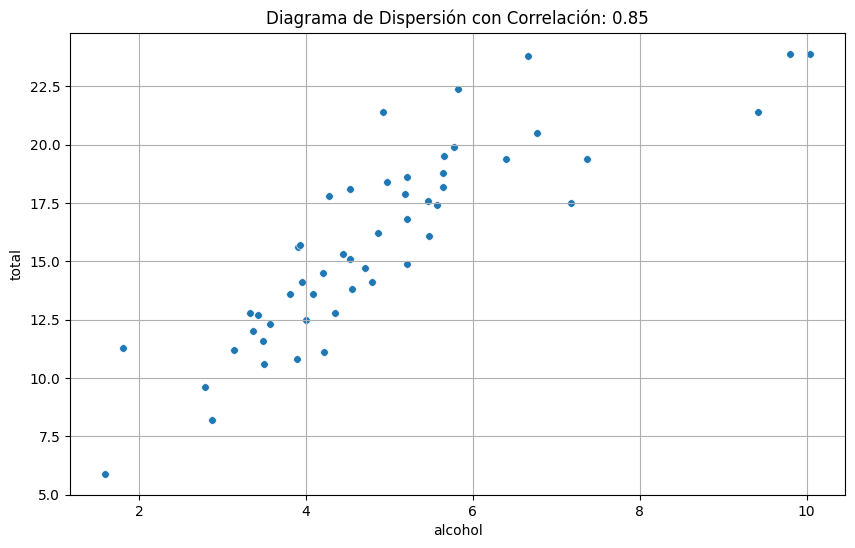

In [57]:
grafico_dispersion_con_correlacion(df_coche,"alcohol", "total", mostrar_correlacion= True, tamano_puntos= 30)

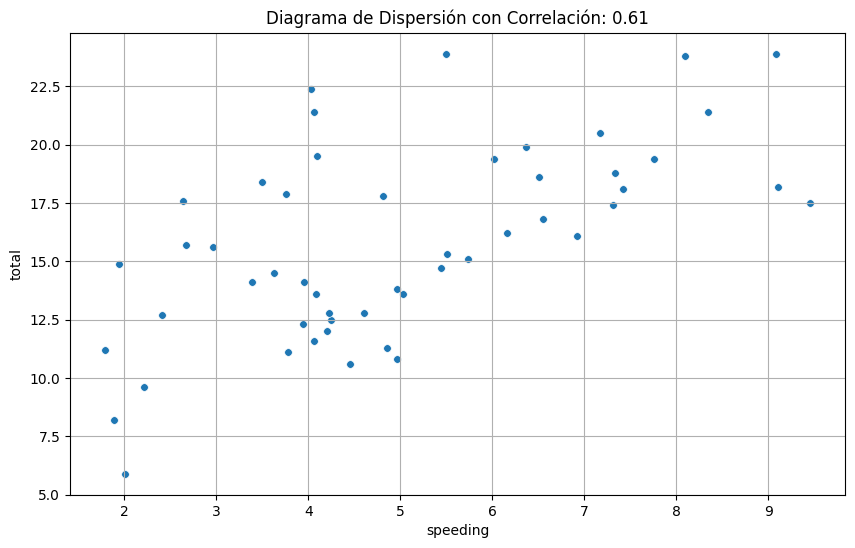

In [58]:
grafico_dispersion_con_correlacion(df_coche,"speeding", "total", mostrar_correlacion= True, tamano_puntos= 30)

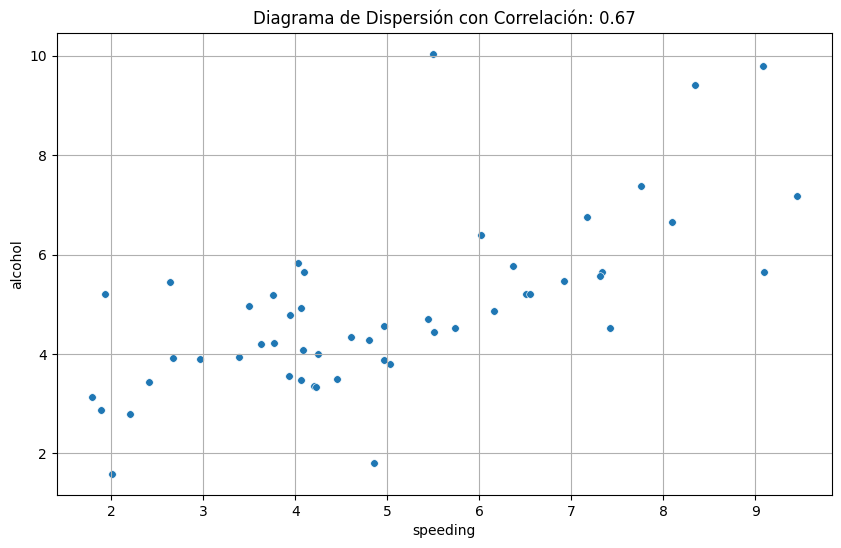

In [60]:
grafico_dispersion_con_correlacion(df_coche,"speeding", "alcohol", mostrar_correlacion= True, tamano_puntos= 30)

In [61]:
# Seguimos viendo como el consumo de alcohol es el mas problematico, tambien tiene que ver el factor vecolidad, como vemos 
# El diagrama de dispersion es positivo, significa que los accidentes por velocidad tambien van acompañados de alcohol